<a href="https://colab.research.google.com/github/ashkanfarhangi/UFC-Prediction/blob/master/UFC_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras.layers import Dense
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/1.TensorFlow/projectUFC/data/ufc_data.xlsx')
df.head()

,Unnamed: 0,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,fight_year,win_fighter1,lose_fighter1,draw_fighter1,nc_fighter1,height_fighter1,reach_fighter1,stance_fighter1,SLpM_fighter1,Str_Acc_fighter1,SApM_fighter1,Str_Def_fighter1,TD_Avg_fighter1,TD_Acc_fighter1,TD_Def_fighter1,Sub_Avg_fighter1,win%_fighter1,born_year_fighter1,win_fighter2,lose_fighter2,draw_fighter2,nc_fighter2,height_fighter2,reach_fighter2,stance_fighter2,SLpM_fighter2,Str_Acc_fighter2,SApM_fighter2,Str_Def_fighter2,TD_Avg_fighter2,TD_Acc_fighter2,TD_Def_fighter2,Sub_Avg_fighter2,win%_fighter2,born_year_fighter2
0,0,Santiago Ponzinibbio,Neil Magny,1,Welterweight,f,KO/TKO,4,2018,28,3,0,0,"6' 0""","73""",Orthodox,4.27,39,4.02,64,0.54,44,60,0.0,90.322580,1986,21,8,0,0,"6' 3""","80""",Orthodox,3.86,46,2.22,56,2.62,46,60,0.3,72.413795,1987
1,1,Ricardo Lamas,Darren Elkins,1,Featherweight,f,KO/TKO,3,2018,19,7,0,0,"5' 8""","71""",Orthodox,2.87,45,2.61,59,1.66,32,47,1.0,73.076920,1982,25,7,0,0,"5' 10""","71""",Orthodox,3.36,37,2.83,53,2.68,35,57,1.3,78.125000,1984
2,2,Johnny Walker,Khalil Rountree Jr.,1,Light Heavyweight,f,KO/TKO,1,2018,15,3,0,0,"6' 5""","82""",Orthodox,5.37,70,3.36,25,0.89,100,100,2.6,83.333336,1992,8,2,0,2,"6' 1""","76""",Southpaw,2.30,34,3.29,38,0.00,0,50,0.3,66.666664,1990
3,3,Cezar Ferreira,Ian Heinisch,0,Middleweight,f,DEC,3,2018,14,7,0,0,"6' 1""","78""",Southpaw,1.83,42,2.14,55,2.97,59,90,0.5,66.666664,1985,12,1,0,0,"5' 11""",NaN,Orthodox,3.49,58,1.67,52,0.81,14,50,1.6,92.307690,1988
4,4,Marlon Vera,Guido Cannetti,1,Bantamweight,f,SUB,2,2018,12,5,1,0,"5' 8""","70""",Switch,3.23,44,3.93,52,0.78,37,68,1.3,66.666664,1992,8,5,0,0,"5' 6""","68""",Southpaw,2.80,52,1.95,51,2.80,50,75,0.3,61.538460,1979


###Preprocess:

In [0]:
X = df.loc[:,["win_fighter1","lose_fighter1",'SLpM_fighter1','Str_Acc_fighter1']]
y = df.loc[:,["end_round","winner"]]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###Modeling:

In [84]:
X_train.shape[1]

4

In [0]:
layers= [100,256,2]
network = models.Sequential()
network.add(Dense(output_dim = layers[0],activation = 'relu',input_dim =(X_train.shape[1])))
network.add(Dense(output_dim = layers[1],activation = 'relu',input_dim =input_dim))
network.add(Dense(output_dim = layers[2],activation = 'linear',input_dim =input_dim))
network.compile(loss ='mse',optimizer='rmsprop')


In [94]:
epoch = 20
batch_size = 1
network.fit(X_train,y_train,epochs= epoch,validation_split=0.05)

Train on 2921 samples, validate on 154 samples
Epoch 1/20
2921/2921 [==============================] - 0s 132us/step - loss: 0.1563 - val_loss: 0.1538
Epoch 2/20
2921/2921 [==============================] - 0s 66us/step - loss: 0.1494 - val_loss: 0.1392
Epoch 3/20
2921/2921 [==============================] - 0s 65us/step - loss: 0.1482 - val_loss: 0.1447
Epoch 4/20
2921/2921 [==============================] - 0s 66us/step - loss: 0.1476 - val_loss: 0.1356
Epoch 5/20
2921/2921 [==============================] - 0s 68us/step - loss: 0.1464 - val_loss: 0.1397
Epoch 6/20
2921/2921 [==============================] - 0s 70us/step - loss: 0.1461 - val_loss: 0.1382
Epoch 7/20
2921/2921 [==============================] - 0s 76us/step - loss: 0.1460 - val_loss: 0.1396
Epoch 8/20
2921/2921 [==============================] - 0s 67us/step - loss: 0.1456 - val_loss: 0.1394
Epoch 9/20
2921/2921 [==============================] - 0s 70us/step - loss: 0.1453 - val_loss: 0.1341
Epoch 10/20
2921/2921 [==

In [101]:
prediciton = network.predict(X_test)
score = network.evaluate(X_test,y_test,verbose =1)
print("Test loss: ",score)

1516/1516 [==============================] - 0s 26us/step
Test loss:  0.1436557554711138


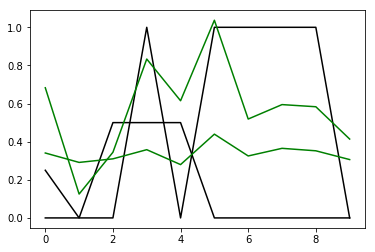

In [104]:
plt.figure(1)
plt.plot(y_test[0:10],label="true",color = 'black')
plt.plot(prediciton[:10],label="predicted",color= 'green')

###References:


In [0]:
# Dataset: https://github.com/naity/DeepUFC2
